Total cell count (excluding edge cells): 60
Cell areas (in pixels, excluding edge cells): [1127.0, 1051.0, 484.0, 834.0, 1596.0, 1119.0, 2599.0, 1411.0, 2270.0, 131.0, 1056.0, 1728.0, 2535.0, 3239.0, 2315.0, 1213.0, 518.0, 1561.0, 2467.0, 2832.0, 1341.0, 2716.0, 2516.0, 3095.0, 2044.0, 2338.0, 1975.0, 4790.0, 70.0, 2141.0, 1122.0, 1743.0, 3197.0, 3436.0, 2821.0, 1576.0, 1171.0, 765.0, 2745.0, 2276.0, 3407.0, 2215.0, 1939.0, 2098.0, 2958.0, 2420.0, 907.0, 2638.0, 2610.0, 2801.0, 2337.0, 2561.0, 2233.0, 1798.0, 1682.0, 830.0, 580.0, 478.0, 201.0, 216.0]
Average cell area: 1881.22 pixels


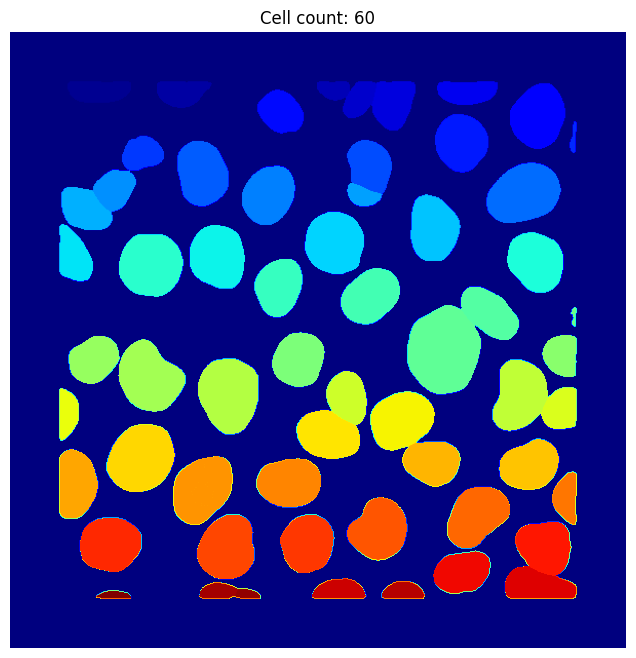

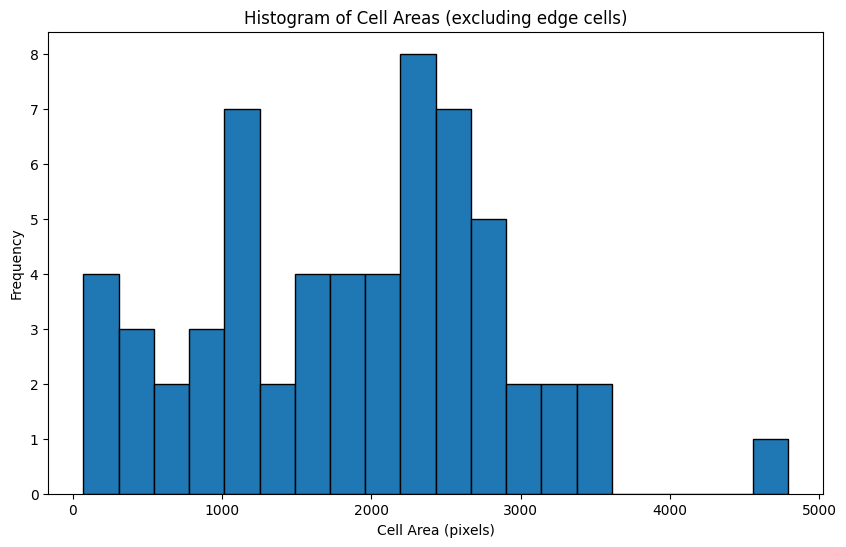

In [ ]:
# Step 1: 安装 Cellpose 和 scikit-image
!pip install cellpose
!pip install scikit-image

# Step 2: 导入必要的库
from cellpose import models, io
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt

# Step 3: 设置图像路径
image_path = '/content/outline before.png'  # 图像路径

# Step 4: 加载并分割图像
model = models.Cellpose(gpu=True, model_type='cyto')  # 使用 'cyto' 模型或其他你需要的模型
img = io.imread(image_path)

# 运行 Cellpose 分割
masks, flows, styles, diams = model.eval(img, diameter=None, flow_threshold=0.4, cellprob_threshold=0.0)

# Step 5: 计算细胞数量和面积，去除边缘细胞
props = measure.regionprops(masks)  # 获取每个标记区域的属性
cell_areas = []
for prop in props:
    # 检查细胞是否位于图像边缘
    minr, minc, maxr, maxc = prop.bbox
    if minr > 0 and minc > 0 and maxr < masks.shape[0] and maxc < masks.shape[1]:
        cell_areas.append(prop.area)  # 仅保留完整的细胞

cell_count = len(cell_areas)  # 过滤后的细胞数量

# 输出结果
print(f"Total cell count (excluding edge cells): {cell_count}")
print(f"Cell areas (in pixels, excluding edge cells): {cell_areas}")
print(f"Average cell area: {np.mean(cell_areas):.2f} pixels")

# Step 6: 可视化分割结果
plt.figure(figsize=(8, 8))
plt.imshow(masks, cmap='jet')  # 显示掩膜图像
plt.title(f"Cell count: {cell_count}")
plt.axis('off')
plt.show()

# Step 7: 绘制细胞面积的直方图
plt.figure(figsize=(10, 6))
plt.hist(cell_areas, bins=20, edgecolor='black')  # 绘制直方图
plt.title("Histogram of Cell Areas (excluding edge cells)")
plt.xlabel("Cell Area (pixels)")
plt.ylabel("Frequency")
plt.show()
